<a href="https://colab.research.google.com/github/Ash100/Documents/blob/main/Lig-RMSD-Anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install MDAnalysis for trajectory analysis
!pip install numpy==1.26.4 MDAnalysis==2.7.0

# Install RDKit for ligand handling
!pip install rdkit-pypi

# Install NGLView for interactive visualization
!pip install nglview

# Install PyMOL (optional, for high-quality images)
!apt-get install pymol

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
# Import MDAnalysis
import MDAnalysis as mda

# Define file paths in Google Drive
traj_file = '/content/drive/MyDrive/Giezam/95424080-S/95434080-S_prod1-10_whole.dcd'  # Replace with your trajectory path
top_file = '/content/drive/MyDrive/Giezam/95424080-S/95424080-S_equil.pdb'     # Replace with your topology path

# Load trajectory and topology
u = mda.Universe(top_file, traj_file)

# Verify loading
print(f"Number of frames: {u.trajectory.n_frames}")
print(f"Number of atoms: {len(u.atoms)}")

Number of frames: 1000
Number of atoms: 30961


/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [23]:
# Load trajectory
u = mda.Universe(top_file, traj_file)
print(f"Number of frames: {u.trajectory.n_frames}")
print(f"Number of atoms: {len(u.atoms)}")

# Select ligand (replace 'LIG' with your ligand's residue name)
ligand = u.select_atoms('resname LIG')

Number of frames: 1000
Number of atoms: 30961


/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [14]:
# Import libraries
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align  # Added 'align' import
import matplotlib.pyplot as plt
import nglview as nv

In [24]:
# Align trajectory to protein
ref = mda.Universe(top_file)
aligner = align.AlignTraj(u, ref, select='protein', filename='/content/aligned.dcd').run()
u_aligned = mda.Universe(top_file, '/content/aligned.dcd')

# Calculate ligand RMSD
rmsd_analysis = rms.RMSD(ligand, select='all', ref_frame=0)
rmsd_analysis.run()

/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


/usr/local/lib/python3.11/dist-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


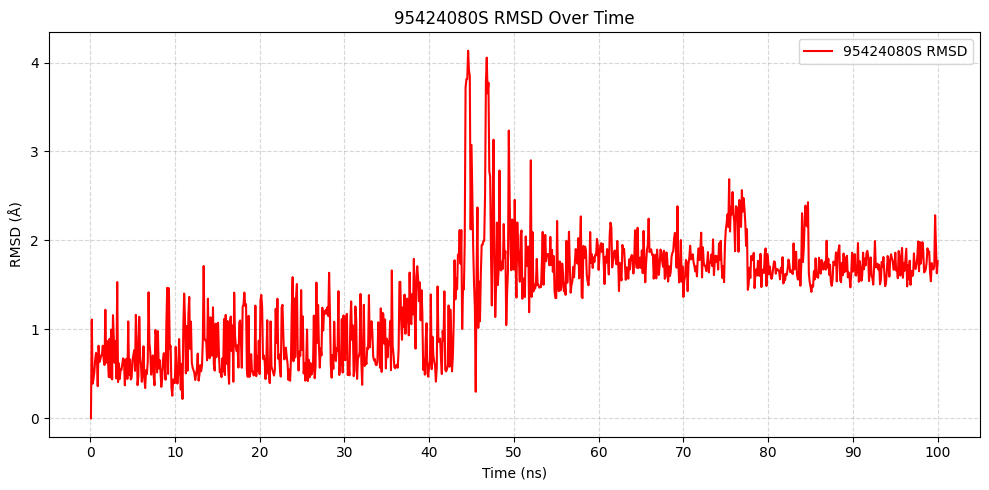

In [25]:
import numpy as np
import matplotlib.pyplot as plt
# Scale X-axis from normalized (0.0 to 1.0) to actual time in ns (0 to 100)
time_ns = rmsd_analysis.rmsd[:, 1] * 100  # Assuming trajectory is 100 ns

# Plot RMSD
plt.figure(figsize=(10, 5))
plt.plot(time_ns, rmsd_analysis.rmsd[:, 2], label='95424080S RMSD', color='red')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (Å)')
plt.title('95424080S RMSD Over Time')
plt.xticks(np.arange(0, 110, 10))  # Set X-axis ticks at 0, 10, ..., 100
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('/content/95424080S_rmsd_plot.png', dpi=1200, bbox_inches='tight')
plt.show()


In [9]:
# Visualize with NGLView
view = nv.show_mdanalysis(u_aligned)
view.add_representation('licorice', selection='resname LIG')  # Ligand in stick style
view.add_representation('cartoon', selection='protein')       # Protein in cartoon
view.add_representation('licorice', selection='(around 5 resname LIG) or resname LIG')  # Nearby residues
view.camera = 'orthographic'  # Better for publication-quality images
view

NGLWidget(max_frame=999)

Mounted at /content/drive
Number of frames: 1000
Number of atoms: 31004
Number of ligand atoms: 43
Ligand residue name: LIG


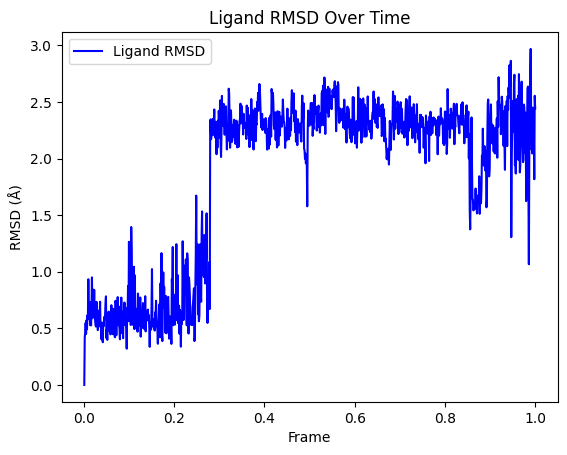

Exception ignored in: <function ReaderBase.__del__ at 0x7d8cd190b6a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/base.py", line 1532, in __del__
    self.close()
  File "/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/DCD.py", line 181, in close
    self._file.close()
  File "MDAnalysis/lib/formats/libdcd.pyx", line 293, in MDAnalysis.lib.formats.libdcd.DCDFile.close
OSError: couldn't close file: b'/content/drive/MyDrive/Giezam/13257574/13257574_prod1-10_whole.dcd'
ErrorCode: Normal EOF
Exception ignored in: <function ReaderBase.__del__ at 0x7d8cd190b6a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/base.py", line 1532, in __del__
    self.close()
  File "/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/PDB.py", line 485, in close
    self._pdbfile.close()
OSError: [Errno 107] Transport endpoint is not connected


Failed to save or empty image: /content/Output/ligand_pose_frame_0.png
Failed to save or empty image: /content/Output/ligand_pose_frame_100.png
Failed to save or empty image: /content/Output/ligand_pose_frame_200.png
Failed to save or empty image: /content/Output/ligand_pose_frame_300.png
Failed to save or empty image: /content/Output/ligand_pose_frame_400.png
Failed to save or empty image: /content/Output/ligand_pose_frame_500.png
Failed to save or empty image: /content/Output/ligand_pose_frame_600.png
Failed to save or empty image: /content/Output/ligand_pose_frame_700.png
Failed to save or empty image: /content/Output/ligand_pose_frame_800.png
Failed to save or empty image: /content/Output/ligand_pose_frame_900.png
Failed to save or empty image: /content/Output/ligand_pose_frame_999.png


TypeError: 'MDAnalysis.coordinates.timestep.Timestep' object does not support the context manager protocol

In [11]:
# Import libraries
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
import matplotlib.pyplot as plt
import nglview as nv
from google.colab import drive
import os
import numpy as np

# Suppress DeprecationWarning
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Attempt to mount Google Drive
try:
    drive.mount('/content/drive', force_remount=True)
    output_dir = '/content/Output'
    traj_file = '/content/drive/MyDrive/Giezam/13257574/13257574_prod1-10_whole.dcd'  # Update with your path
    top_file = '/content/drive/MyDrive/Giezam/13257574/13257574_equil.pdb'    # Update with your path
except Exception as e:
    print(f"Failed to mount Google Drive: {e}")
    print("Using local storage. Upload files to Colab.")
    from google.colab import files
    uploaded = files.upload()  # Upload trajectory.xtc and topology.pdb
    traj_file = '/content/drive/MyDrive/Giezam/13257574/13257574_prod1-10_whole.dcd'
    top_file = '/content/drive/MyDrive/Giezam/13257574/13257574_equil.pdb'
    output_dir = '/content/Output'
os.makedirs(output_dir, exist_ok=True)

# Load trajectory
u = mda.Universe(top_file, traj_file)
print(f"Number of frames: {u.trajectory.n_frames}")
print(f"Number of atoms: {len(u.atoms)}")

# Select ligand using resid 294
ligand = u.select_atoms('resid 294')
print(f"Number of ligand atoms: {len(ligand)}")
print(f"Ligand residue name: {ligand.resnames[0] if len(ligand) > 0 else 'None'}")

if len(ligand) == 0:
    raise ValueError("Ligand selection 'resid 294' returned no atoms. Check residue ID.")

# Align trajectory to protein
ref = mda.Universe(top_file)
aligner = align.AlignTraj(u, ref, select='protein', filename='/content/aligned.dcd').run()
u_aligned = mda.Universe(top_file, '/content/aligned.dcd')

# Calculate ligand RMSD
rmsd_analysis = rms.RMSD(ligand, select='all', ref_frame=0)
rmsd_analysis.run()

# Plot RMSD
plt.plot(rmsd_analysis.rmsd[:, 1], rmsd_analysis.rmsd[:, 2], label='Ligand RMSD', color='blue')
plt.xlabel('Frame')
plt.ylabel('RMSD (Å)')
plt.title('Ligand RMSD Over Time')
plt.legend()
plt.savefig(f'{output_dir}/ligand_rmsd_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Enable NGLView widget
from google.colab import output
output.enable_custom_widget_manager()

# Visualize individual frames with NGLView
view = nv.show_mdanalysis(u_aligned)
view.add_representation('licorice', selection='resid 294')  # Ligand in stick style
view.add_representation('cartoon', selection='protein')    # Protein in cartoon
view.add_representation('licorice', selection='(around 5 resid 294) or resid 294')  # Nearby residues
view.camera = 'orthographic'
view.center(selection='resid 294')
view

# Save high-quality images for individual frames
frames = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 999]
for frame in frames:
    view.frame = frame
    output_file = f'{output_dir}/ligand_pose_frame_{frame}.png'
    view.download_image(filename=output_file, factor=4, trim=True)
    if os.path.exists(output_file) and os.path.getsize(output_file) > 0:
        print(f"Saved image: {output_file} ({os.path.getsize(output_file) / 1024:.2f} KB)")
    else:
        print(f"Failed to save or empty image: {output_file}")

# Create a new universe for all ligand poses
n_atoms = len(ligand)
n_frames = len(frames)
coords = np.zeros((n_frames, n_atoms, 3))
for i, frame in enumerate(frames):
    u_aligned.trajectory[frame]  # Set trajectory to specific frame
    coords[i] = ligand.positions.copy()  # Copy coordinates

# Create a new universe for all ligand poses
n_atoms = len(ligand)
n_frames = len(frames)
coords = np.zeros((n_frames, n_atoms, 3))

# Extract and verify coordinates for each frame
for i, frame in enumerate(frames):
    with u_aligned.trajectory[frame]:  # Ensure frame is set
        coords[i] = ligand.positions.copy()  # Copy coordinates
    # Print first atom's coordinates for verification
    print(f"Frame {frame} first atom coords: {coords[i][0]}")

# Verify coordinates are different
if np.all(coords == coords[0]):
    print("Warning: All ligand coordinates are identical across frames!")

# Create a new universe for all ligand poses
n_atoms = len(ligand)
n_frames = len(frames)
coords = np.zeros((n_frames, n_atoms, 3))

# Extract and verify coordinates for each frame
for i, frame in enumerate(frames):
    u_aligned.trajectory[frame]  # Set trajectory to specific frame
    coords[i] = ligand.positions.copy()  # Copy coordinates
    # Print first atom's coordinates for verification
    print(f"Frame {frame} first atom coords: {coords[i][0]}")

# Verify coordinates are different
if np.all(coords == coords[0]):
    print("Warning: All ligand coordinates are identical across frames!")

# Create a temporary PDB for all poses
ligand_atoms = ligand.atoms
with mda.Writer(f'{output_dir}/all_ligand_poses.pdb', n_atoms=n_atoms) as writer:
    for i in range(n_frames):
        temp_u = mda.Universe.empty(n_atoms, n_residues=1, trajectory=True)
        temp_u.add_TopologyAttr('resids', [i+1])  # Single resid per frame
        temp_u.add_TopologyAttr('resnames', [ligand.resnames[0] if len(ligand.resnames) == 1 else 'LIG'])
        temp_u.add_TopologyAttr('names', ligand.names)
        temp_u.atoms.positions = coords[i]
        writer.write(temp_u.atoms)

# Load all poses and visualize
u_all_poses = mda.Universe(f'{output_dir}/all_ligand_poses.pdb')
view_all = nv.show_mdanalysis(u_all_poses)
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink', 'teal']
for i in range(n_frames):
    view_all.add_representation('licorice', selection=f'resid {i+1}', color=colors[i % len(colors)])
view_all.camera = 'orthographic'
view_all.center()
view_all

# Save single image with all poses
output_file = f'{output_dir}/all_ligand_poses.png'
view_all.download_image(filename=output_file, factor=6, trim=True)
if os.path.exists(output_file) and os.path.getsize(output_file) > 0:
    print(f"Saved all poses image: {output_file} ({os.path.getsize(output_file) / 1024:.2f} KB)")
else:
    print(f"Failed to save or empty all poses image: {output_file}")

# Verify saved images
print("Checking saved images:")
!ls -lh {output_dir}

# Download images if using local storage
if output_dir.startswith('/content'):
    from google.colab import files
    for frame in frames:
        if os.path.exists(f'{output_dir}/ligand_pose_frame_{frame}.png'):
            files.download(f'{output_dir}/ligand_pose_frame_{frame}.png')
    if os.path.exists(f'{output_dir}/all_ligand_poses.png'):
        files.download(f'{output_dir}/all_ligand_poses.png')
    if os.path.exists(f'{output_dir}/ligand_rmsd_plot.png'):
        files.download(f'{output_dir}/ligand_rmsd_plot.png')